# Laboratorio 10 - AutoCodificadores

## Complete las tareas indicadas abajo

**TAREA: Ejecute las siguientes importaciones**

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Los datos

En la tabla que van a trabajar, se encuentra el consumo promedio de 17 tipos de comida, en gramos por persona por semana, para cada país del Reino Unido (UK).

La tabla tiene algunas variaciones interesantes en diferentes tipos de comida, pero a nivel general las diferencias no son tan notables.

**TAREA:  Ejecute la siguiente instrucción para leer los datos**

Es posible que tenga que modificar la instrucción de acuerdo al lugar donde descargó el archivo.

In [70]:
df = pd.read_csv('UK_foods.csv',index_col='Unnamed: 0')

**TAREA: Despliegue el DataFrame**

In [71]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


**TAREA:  Realice la transposición del DataFrame para que las columnas se conviertan en el índice.**

In [73]:
df_t = df.transpose()

In [74]:
df_t

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TAREA:  Cree un mapa de calor a partir del DataFrame.** 

¿Existe algún país que sobresalga por diferencia de los otros?  Puede ser bastante difícil determinar esto solo por la imagen.

¿Habrá algún par de países que parezcan muy similares entre si?



<AxesSubplot:>

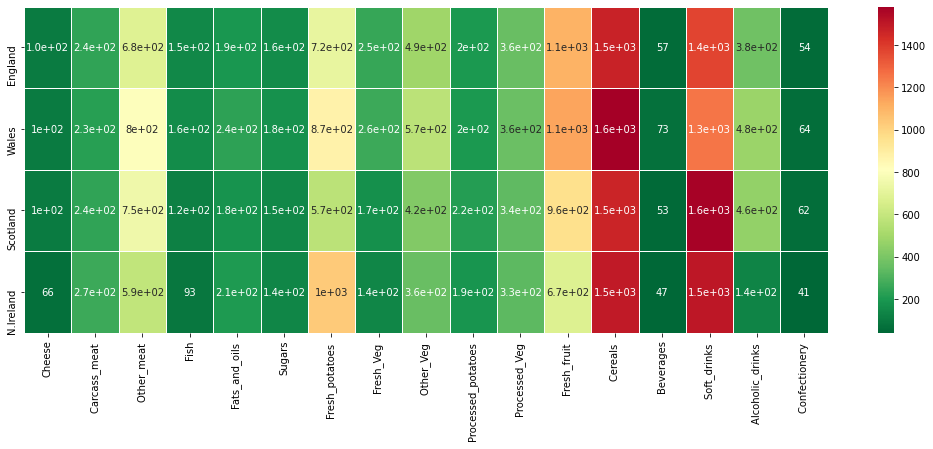

In [75]:
sns.heatmap(df_t, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [76]:
df_t.style.background_gradient(cmap='Blues')

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Pareciera ser que WALES suele diferenciarce bastante en relacion al consumo de varias comidas con otros paises, esto principalemente se ve en other_meat, fish, fats_and_oils, sugars, other_veg y cereals. Esto tambien se pueded decir de N.Ireland que suele tener el consumo mas bajo de la mayoria de productos.  
Los paises que mas se parecen definitivamente son England y scotland, sus consumos se mantienen bastante cercanos exceptuando ciertas comidas.

**TAREA:  Realice las importaciones necesarias para construir un AutoCodificador.  La meta será reducir las dimensiones de 17 --> 2 y ver si hay países que resalten como diferentes.**

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

**TAREA:  Cree un codificador**

In [78]:
codificador = Sequential()
codificador.add(Dense(units = 2,
                      activation = 'relu',
                      input_shape = [17]))

**TAREA: Cree un decodificador.**

In [79]:
decodificador = Sequential()
decodificador.add(Dense(units = 17,
                        activation = 'relu',
                        input_shape = [2]))

**TAREA: Combine el codificador y el decodificador para conformar un AutoCodificador, y complile el modelo.**

In [80]:
autocodificador = Sequential([codificador,
                              decodificador])
autocodificador.compile(loss = "mse",
                        optimizer = SGD(learning_rate = 1.5))

**TAREA: Cree un escalador MinMaxScaler para normalizar (escalar) los datos.  Asegúrese de transponer los datos ya que realmente tenemos 17 columnas (features) y solo 4 filas (uno por país).**

In [81]:
escalador = MinMaxScaler()
df_es = escalador.fit_transform(df_t)
df_es

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [82]:
df_es.shape

(4, 17)

In [ ]:
# NOTA la forma debe ser 17 columnas por 4 filas.

**TAREA:  Ajuste el AutoCodificador a los datos normalizados por medio de 15 épocas.**

In [83]:
autocodificador.fit(df_es, df_es, epochs = 15)

Epoch 1/15
1/1 [==============================] - 0s 204ms/step - loss: 0.3961
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 0.3529
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2941
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2724
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2620
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2568
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2536
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2513
Epoch 9/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2479
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 13/15
1/1 [==============================] - 0s 2ms/step - loss: 

**TAREA: Pase los datos normalizados solo por el codificador y prediga la salida ya re-dimensionada.  Nota: Lo más seguro es que obtengan resultados diferentes debido a las inicializaciones al azar.**

In [88]:
results_cod = codificador.predict(df_es)

In [89]:
results_cod.shape

(4, 2)

In [90]:
results_cod

array([[0.       , 1.4421391],
       [0.       , 2.6333961],
       [0.       , 1.186027 ],
       [1.0020742, 0.       ]], dtype=float32)

**TAREA:  Una los datos codificados bidimensionales, con el indice original de países.  Asegúrese de verificar el orden del índice para asegurar que quede unido correctamente.  Hay muchas formas de hacer esto con Pandas.**

In [102]:
results_auto = autocodificador.predict(df_es)
results_auto

array([[0.7543795 , 0.17328823, 0.        , 0.6058993 , 0.        ,
        0.        , 0.34599584, 0.605881  , 0.        , 0.        ,
        0.        , 0.68239504, 0.34017158, 0.        , 0.        ,
        0.        , 0.6959927 ],
       [1.2308922 , 0.29580617, 0.        , 1.0884795 , 0.        ,
        0.        , 0.53658396, 1.0512692 , 0.        , 0.        ,
        0.        , 1.1353012 , 0.7227038 , 0.        , 0.        ,
        0.        , 1.0761653 ],
       [0.6519326 , 0.14694771, 0.        , 0.50214785, 0.        ,
        0.        , 0.30502072, 0.5101256 , 0.        , 0.        ,
        0.        , 0.58502334, 0.25792977, 0.        , 0.        ,
        0.        , 0.6142582 ],
       [0.2595735 , 0.        , 0.        , 0.0976738 , 0.371966  ,
        0.08108671, 0.7916601 , 0.        , 0.11174357, 0.        ,
        0.        , 0.24898995, 0.        , 0.0020743 , 0.        ,
        0.        , 0.10257886]], dtype=float32)

**TAREA:  Ahora grafique estos resultados con una gráfica de dispersión, etiquedados por su país respectivo.**

¿Se nota ya algún país que difiera de los otros?  ¿Cuál?

In [ ]:
#SU CODIGO AQUI

Al regresar a ver los datos en la tabla, esto tiene sentido: los Nor-Irlandeses comen mucho más gramos de papas frescas y mucho menos de frutas frescas, queso, pescado y bebidad alcohólicas.

Es buena seña que la estructura que se visualiza refleje un hecho grande de la geografía real:  Irlanda del Norte es el único de los cuatro países que no están en la isla de Gran Bretaña. (Si tiene confusión entre Inglaterra, el Reino Unido y Gran Bretaña, vea: este [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)